In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv

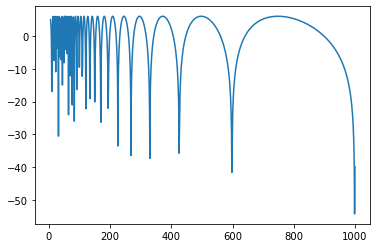

In [3]:
ds = np.linspace(5,1000,1000)

c = 300000000.0
f = 900000000.0
# d = 10000.0
h_T = 50
h_R = 5
d_1 = np.sqrt(np.power(h_T-h_R, 2) + np.power(ds, 2)) # distance from h_T to h_R
## finding psi, the incident angle 
crow_d = (-1*h_T) / ((-1 * (h_T + h_R))/ds) # distance from h_T to reflection point
psi_rad = np.arctan(h_T/crow_d)
psi_deg = 360*psi_rad/(2*np.pi)
# for i in range(len(psi_rad)):
#     print("psi {:.5f} radians or {:.5f} degrees ".format(psi_rad[i], psi_deg[i]))

## calculating the reflection coefficient for vertically polarized wave
epsilon = 1                 # dielectric constant of the average ground
sigma = 1e7                 # conductivity of average ground
epsilon_fs = 8.8541878128e-12      # dielectric constant of free space aka vacuum permitivity 
omega = 2 * np.pi * f        # angular frequency of transmission
x = sigma / (omega * epsilon_fs)
# x_check = 18e9 * sigma / f
# print("the following two numbers should be the same\n{:.5f} {}".format(x, x_check))
## finally calculating the reflection coefficient (vertically polarized)

comp_part = epsilon - 1j*x
rnum = comp_part * np.sin(psi_rad) - np.sqrt(comp_part - np.power(np.cos(psi_rad),2))
rden = comp_part * np.sin(psi_rad) + np.sqrt(comp_part - np.power(np.cos(psi_rad),2))
rho_v = rnum / rden
# print("reflection coefficient {:.10f} + {:.10f}j".format(rho_v.real, rho_v.imag))
mag = np.sqrt(np.power(rho_v.real,2)+ np.power(rho_v.imag,2))

## find phase difference between the direct ray and the reflected ray
d_2 = np.sqrt(np.power(h_T+h_R, 2) + np.power(ds, 2))                    # distance traveled by reflected ray
delta_d = d_2 - d_1                                                       # difference in distance between direct and reflected rays
# print("direct len {:.1f} reflected len {:.1f}".format(d_1, d_2))
lamb = c/f                                                              # wavelength meters
# print("lambda {:.5f}".format(lamb))
delta_phi = (2*np.pi/lamb) * delta_d                                    # phase difference between direct and reflected rays
# print("phase diff {:.5f} radians, {:.5f} degrees".format(
#     delta_phi,
#     delta_phi*360 / (2*np.pi)
#     ))

ce_phi = np.cos(delta_phi) - (1j * np.sin(delta_phi))
change_E = 1 + rho_v * ce_phi

direct_ray_power = np.power(lamb/(4*np.pi*d_1), 2)
reflect_ray_power = np.power(change_E.real,2)+ np.power(change_E.imag,2)

plt.plot(ds, 10*np.log10(reflect_ray_power))
plt.show()

two ray path loss, over distance


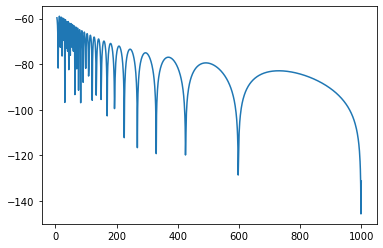

In [4]:
print("two ray path loss, over distance")
tot_power = 10*np.log10(direct_ray_power * reflect_ray_power)
plt.plot(ds, tot_power)
plt.show()

In [8]:
f2 = "sim2r8.txt"
sim_ds = []
sim_LOS_ds = []
sim_2Rlosses = []
sim_freelosses = []
with open(f2) as csvfile:
    rc = csv.reader(csvfile)
    first = True
    for row in rc:
        if first:
            first = False
            continue
        sim_ds.append(float(row[0]))
        sim_LOS_ds.append(float(row[1]))
        sim_2Rlosses.append(-1*float(row[2]))
        sim_freelosses.append(-1*float(row[3]))

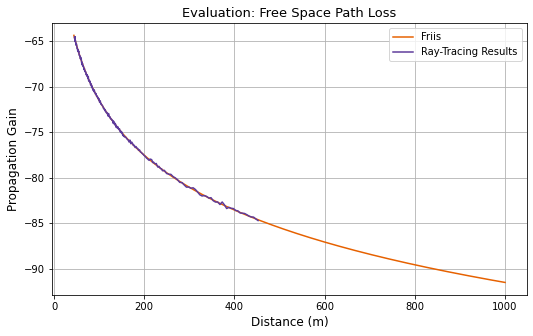

In [9]:
plt.rcParams["figure.figsize"] = (8.5,5)
color_2r = '#e66100'#'#4b0092'#'#994f00'
color_RT = '#5d3a9b'#'#1aff1a'#'#006cd1'
plt.title("Evaluation: Free Space Path Loss", size=13)
true_fspl = (20*np.log10(f) + 20*np.log10(ds) + 20*np.log10((4*np.pi)/c))*-1
plt.plot(ds[39:], true_fspl[39:], label="Friis", color=color_2r)
plt.plot(sim_LOS_ds, sim_freelosses, label="Ray-Tracing Results", color=color_RT)
plt.xlabel("Distance (m)", size=12)
plt.ylabel("Propagation Gain", size=12)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

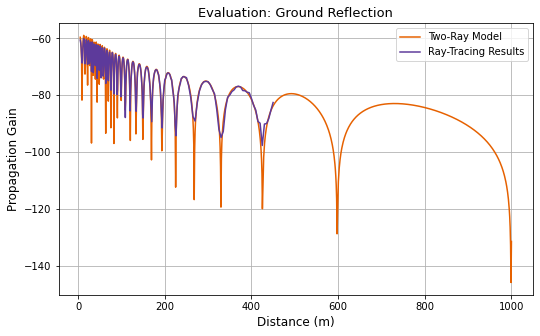

The environment only contains the ground which produces specular reflections.
epsilon = 1 (dielectric constant)
sigma = 1e7 (conductivity)
Frequency is 900MHz. TX antenna height is 50m, RX height is 5m.
1e9 rays were shot, and the receiver sphere scales with distance.


In [10]:
plt.rcParams["figure.figsize"] = (8.5,5)
color_2r = '#e66100'#'#4b0092'#'#994f00'
color_RT = '#5d3a9b'#'#1aff1a'#'#006cd1'
plt.title("Evaluation: Ground Reflection", size=13)
plt.plot(ds, tot_power, label="Two-Ray Model", color=color_2r)
plt.plot(sim_ds, sim_2Rlosses, label="Ray-Tracing Results", color=color_RT)
plt.xlabel("Distance (m)", size=12)
plt.ylabel("Propagation Gain", size=12)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
print("The environment only contains the ground which produces specular reflections.\nepsilon = 1 (dielectric constant)\nsigma = 1e7 (conductivity)")
print("Frequency is 900MHz. TX antenna height is 50m, RX height is 5m.")
print("1e9 rays were shot, and the receiver sphere scales with distance.")

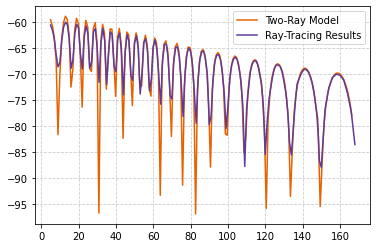

In [11]:
plt.rcParams["figure.figsize"] = (6,4)
plt.plot(ds[:163], tot_power[:163], label="Two-Ray Model", color=color_2r)
plt.plot(sim_ds[:155], sim_2Rlosses[:155], label="Ray-Tracing Results", color=color_RT)
plt.legend(loc='upper right')
plt.grid(which='major', color='#CCCCCC', linestyle='--')
#plt.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.show()